<a href="https://colab.research.google.com/github/he16946/Data_Labs/blob/master/Passwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
os.environ['KAGGLE_USERNAME'] = "ce889group3" # username from the json file

os.environ['KAGGLE_KEY'] = "2fec783dbd857229b51562347fd33dfe" # key from the json file

! kaggle datasets download -d bhavikbb/password-strength-classifier-dataset
! unzip -q "password-strength-classifier-dataset.zip"

password-strength-classifier-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
df = pd.read_csv("data.csv", error_bad_lines=False)
df.shape

 Data is 2 columns, one showing the password, the second showing its strength

In [7]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


Cleaning up data and removing NaNs

In [8]:
df.columns

#check for nans
df.isna().sum() 

password    1
strength    0
dtype: int64

In [9]:
#find and remove nan value
df[df.isnull().any(axis=1)]

,password,strength
367579,NaN,0


In [0]:
df = df.dropna()

Check for balance of data, classified into strong (74.19%) and not strong (25.81%)

In [11]:
print('Weak', round(df['strength'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Medium', round(df['strength'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Strong', round(df['strength'].value_counts()[2]/len(df) * 100,2), '% of the dataset')

Weak 13.4 % of the dataset
Medium 74.19 % of the dataset
Strong 12.42 % of the dataset


(array([ 89701.,      0.,      0.,      0.,      0., 496801.,      0.,
             0.,      0.,  83137.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

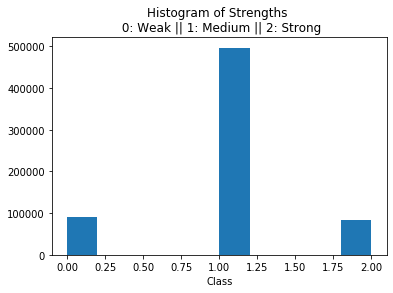

In [12]:
plt.title('Histogram of Strengths \n 0: Weak || 1: Medium || 2: Strong')
plt.xlabel('Class')
plt.hist(df['strength'])

Extracting features from data (password length, upper-case, lower-case) and their correlation with strength 

In [0]:
lengths = df['password'].str.len()

In [0]:
df.insert(2, 'length', lengths)

In [36]:
df.head()

,password,strength,length
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11


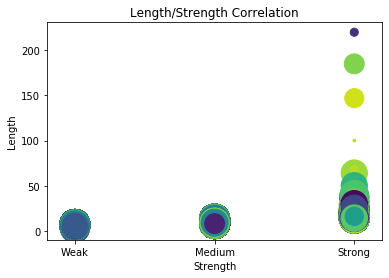

In [30]:
y = df['length']
x = df['strength']
area = (30 * np.random.rand(669639))**2  # 0 to 15 point radii
colors = np.random.rand(669639)
plt.title('Length/Strength Correlation')
plt.xlabel('Strength')
plt.xticks([0,1,2], ['Weak', 'Medium', 'Strong'])
plt.ylabel('Length')
plt.scatter(x,y, s=area, c = colors)

,password,strength,length,numbers
0,kzde5577,1,8,0
1,kino3434,1,8,0
2,visi7k1yr,1,9,0
3,megzy123,1,8,0
4,lamborghin1,1,11,0


In [147]:
def split(word): 
    return [char for char in word] 

def upper_case(word):
  count = 0 
  for x in word:
    for char in x:
     if char.isupper():
        count = count + 1
  return count
  count = 0 

def lower_case(word):
  count = 0 
  for x in word:
    for char in x:
     if char.islower():
        count = count + 1
  return count
  count = 0 

def number(word):
  count = 0 
  for x in word:
    for char in x:
     if char.isdigit():
        count = count + 1
  return count
  count = 0 

def spesh(word):
  for x in word:
    return len(word) - (number(word) + lower_case(word) + upper_case(word))

df['upper'] = df['password'].apply(lambda x: upper_case(x))
df['lower'] = df['password'].apply(lambda x: lower_case(x))
df['numbers'] = df['password'].apply(lambda x: number(x))
df['special_characters'] = df['password'].apply(lambda x: spesh(x))
df.head()

,password,strength,length,numbers,upper,lower,special_characters
0,kzde5577,1,8,4,0,4,0
1,kino3434,1,8,4,0,4,0
2,visi7k1yr,1,9,2,0,7,0
3,megzy123,1,8,3,0,5,0
4,lamborghin1,1,11,1,0,10,0


In [150]:
df['special_characters'].argmax()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


125595

In [154]:
df.loc[[125595]]

,password,strength,length,numbers,upper,lower,special_characters
125595,bV1*tB2$s$LW0$fgCqGetE$dZop9ugK7ftSl8BQu*$E4!r...,2,100,15,30,34,21
